# I. Overview:

* EDA on sample EDNA FCI Data from ftp server and data attached in Ron's email on 6/8/17

# II. Libraries:

In [1]:
from pytz import timezone, UTC
import matplotlib.pyplot as plt
import pandas as pd


EASTERN = timezone('US/Eastern')
plt.style.use('ggplot')
%matplotlib inline

# III Functions:

In [2]:
def load_date(pwd, f_name):
    '''
    PUPROSE:
        - load data
        - parse date and convert to EASTERN, then UTC
    INPUT:
        - pwd (str; path to files), f_name (str; file name)
    OUTPUT:
        - df (pd df)
    '''
    df = pd.read_csv(pwd+f_name)
    df = df.loc[df['Time']!='1/1/0001 12:00:00 AM']
    
    df.Time = pd.to_datetime(df.Time)
    df.Time = df.Time.dt.tz_localize(EASTERN, ambiguous='NaT')
    df.Time = df.Time.dt.tz_convert(UTC)
                                     
    return df

In [3]:
def graph_daily_count(df, title):
    '''
    PURPOSE:
        - takes a df with time stamp values
        - aggregate daily count
        - graph in a ts fashion of daily count
    INPUT:
        - df (pd df), title (str)
    OUTPUT:
        - N/A
    '''
    df['Date'] = df['Time'].dt.date
    daily_count =\
        df.groupby(['Date']).agg(['count'])['Extended Id']['count'].reset_index()
    daily_count.sort(['Date'], inplace=True)
    # plot:
    plt.figure(figsize=(20, 10))
    plt.plot(daily_count['Date'], daily_count['count'], '--o--')
    plt.ylabel('daily count')
    plt.xlabel('time')
    plt.title(title)
    plt.show()

# IV. EDA Test Data (From FTP Server):

* Summary:
    * Data timestamp include: '1-01-01 00:00:00' --> invalid
    * A lot of repeating values (in terms of time stamp and magnitude) for I_FAULT and FAULT
    * A lot of 'unreliable' status for DNP Point readings
    * All I_FAULT = zero
    * IN_SCAN is relatively normal
    * Unusable

In [4]:
# load data:
pwd =\
    '/Users/erichsieh/Desktop/conda_envs/'+\
    'pam_modeling_e/edna_raw_EDA/EDNA_Test_Data_6_8_17/'
f_fault, f_i_fault, f_in_scan =\
    'COUNTRY_CLUB.805933.FCI.593302B.FAULT.B_PH.csv',\
    'MIAMI_SHORES.803434.FCI.343703B.I_FAULT.B_PH.csv',\
    'NORMANDY_BEACH.801038.FCI.103210B.IN_SCAN.B_PH.csv'
    
s_fault = load_date(pwd, f_fault)
s_i_fault = load_date(pwd, f_i_fault)
s_in_scan = load_date(pwd, f_in_scan)

## i. FAULT:

In [5]:
s_fault['Time'].value_counts()

2014-07-05 22:48:00    2070
2014-05-17 19:09:13       1
Name: Time, dtype: int64

In [6]:
s_fault['Value'].value_counts()

0    2071
Name: Value, dtype: int64

In [7]:
s_fault['ValueString'].value_counts()

NORMAL    2071
Name: ValueString, dtype: int64

In [8]:
s_fault['Status'].value_counts()

OK - NOT SET    1037
UNRELIABLE      1034
Name: Status, dtype: int64

## ii. I_FAULT:

In [9]:
s_i_fault['Time'].value_counts()

2014-07-09 20:32:25    2050
2014-06-13 11:08:34       1
Name: Time, dtype: int64

In [10]:
s_i_fault['Value'].value_counts()

0    2051
Name: Value, dtype: int64

In [11]:
s_i_fault['ValueString'].value_counts()

0    2051
Name: ValueString, dtype: int64

In [12]:
s_i_fault['Status'].value_counts()

OK            1027
UNRELIABLE    1024
Name: Status, dtype: int64

## iii. IN_SCAN:

In [13]:
norm_in_scan = s_in_scan.loc[s_in_scan['Value']==1]
alarm_in_scan = s_in_scan.loc[s_in_scan['Value']==0]

sample_info = 'NORMANDY_BEACH.801038 (FCI)'

/Users/erichsieh/miniconda2/envs/pam_modeling_e/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/erichsieh/miniconda2/envs/pam_modeling_e/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


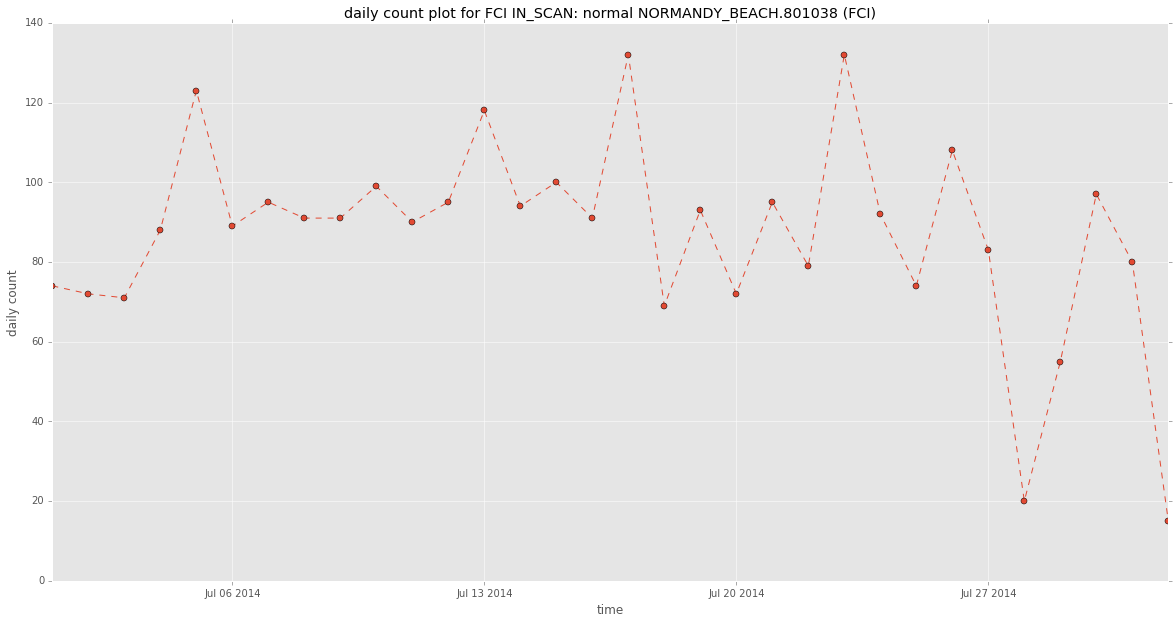

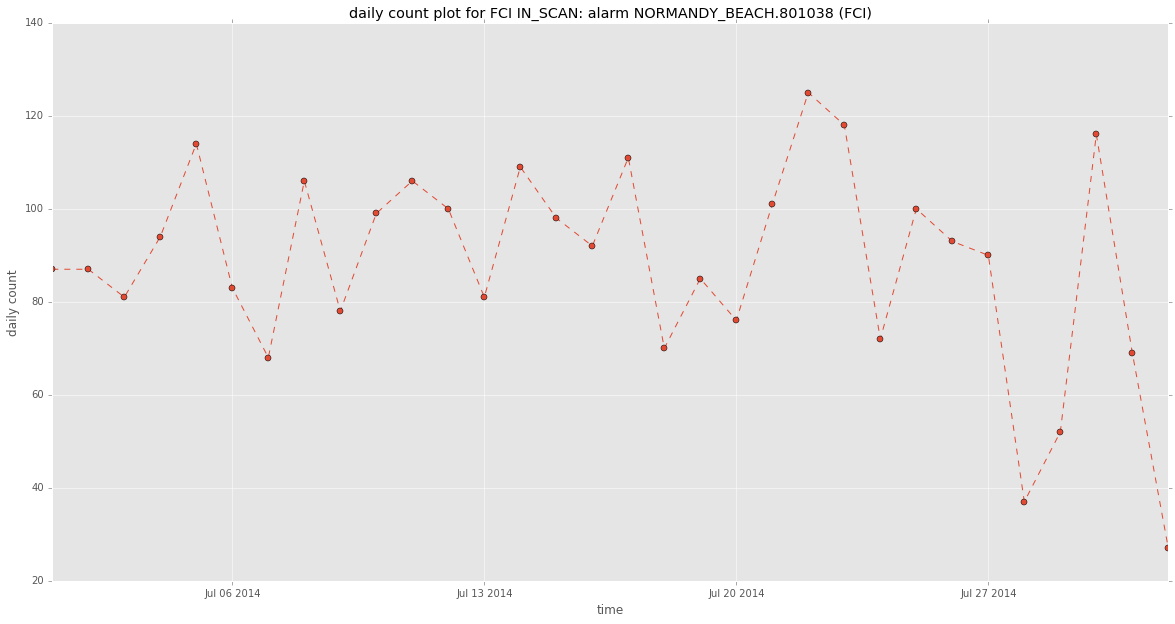

In [14]:
graph_daily_count(
        norm_in_scan, 
        'daily count plot for FCI IN_SCAN: normal {}'.format(sample_info)
    )
graph_daily_count(
        alarm_in_scan,
        'daily count plot for FCI IN_SCAN: alarm {}'.format(sample_info)
    )

# V. EDA Sample Data from Ron's 6_8_17 email:

* Summary:
    * Data timestamp include: '1-01-01 00:00:00' --> invalid
    * With the exception of some repeating readings in I_FAULT (magnitude and time stamp), the data looks relatively healthy
    * For I_FAULT, sometimes it will have 60 ~ 100 readings a day (might not be normal) 
    * Looks around the same health level as the data we get in monthly drop

In [15]:
# load data:
pwd =\
    '/Users/erichsieh/Desktop/conda_envs/'+\
    'pam_modeling_e/edna_raw_EDA/EDNA_Data_Ron_Email_6_8_17/'
    
f_fault, f_i_fault_Miami_Shores, f_i_fault_Seaboard, f_in_scan =\
    'Lawrence_Fault_Dec_2014_FAULT.csv',\
    'Miami_Shores_36340A_June_2014_I_FAULT.csv',\
    'Seaboard_363406A_June_2014_I_FAULT.csv',\
    'Red_Road_In_Scan_dec_2015_IN_SCAN.csv'
    
s_fault = load_date(pwd, f_fault)
s_i_fault_miami_shores = load_date(pwd, f_i_fault_Miami_Shores)
s_i_fault_seaboard = load_date(pwd, f_i_fault_Seaboard)
s_in_scan = load_date(pwd, f_in_scan)

## i. FAULT:

In [16]:
s_fault['Time'].value_counts().head(3)
# no repeating times

2014-12-07 17:53:00    1
2014-12-03 05:08:00    1
2014-12-22 03:40:00    1
Name: Time, dtype: int64

In [17]:
s_fault['Value'].value_counts()
# normal and not normal values about 50% and 50%

0    598
1    563
Name: Value, dtype: int64

In [18]:
s_fault['ValueString'].value_counts()
# matches the value

NORMAL    598
FAULT     563
Name: ValueString, dtype: int64

In [19]:
s_fault['Status'].value_counts()
# matches the values, look normal

OK - NOT SET    598
OK - SET        563
Name: Status, dtype: int64

## ii. I_FAULT (Miami Shores):

In [20]:
s_i_fault_miami_shores['Time'].value_counts().head(3)
# 18*2 repeating readings (based on time stamps) (total readings = 646)

2014-06-02 19:49:00    2
2014-06-17 17:29:00    2
2014-06-05 16:41:00    2
Name: Time, dtype: int64

In [21]:
s_i_fault_miami_shores['Value'].value_counts().head(10)
# some repetitive readings

0       355
1103      4
1277      4
805       4
924       4
914       3
955       3
949       3
946       3
932       3
Name: Value, dtype: int64

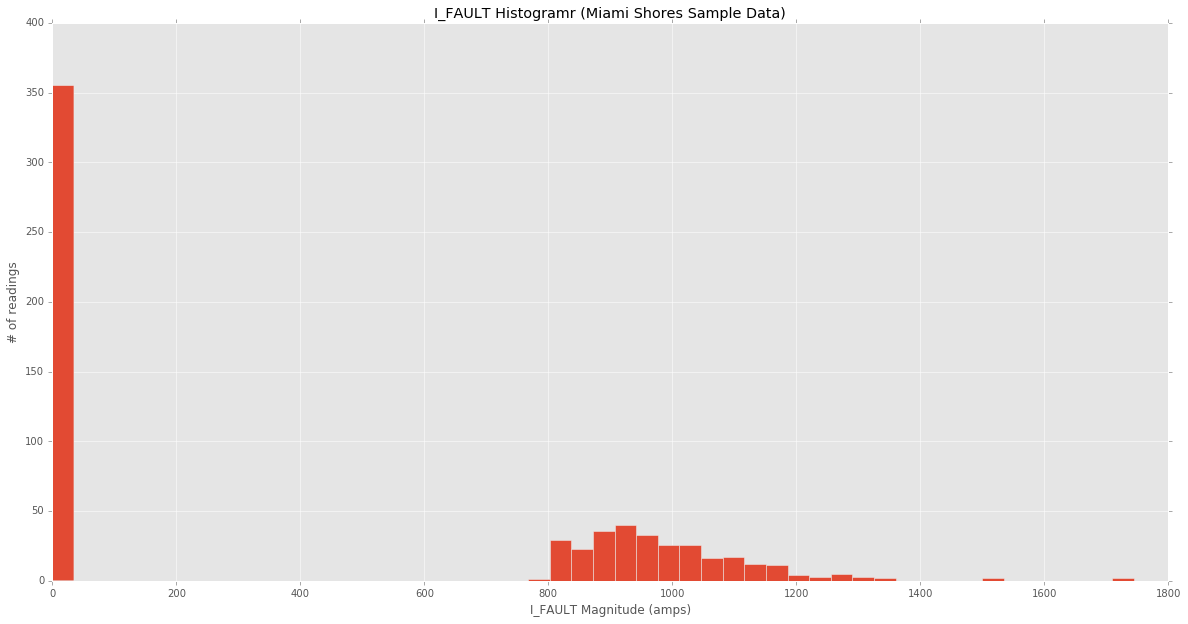

In [22]:
s_i_fault_miami_shores['Value'].hist(bins=50, figsize=(20, 10))
plt.ylabel('# of readings')
plt.xlabel('I_FAULT Magnitude (amps)')
plt.title('I_FAULT Histogramr (Miami Shores Sample Data)')
plt.show()

/Users/erichsieh/miniconda2/envs/pam_modeling_e/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/erichsieh/miniconda2/envs/pam_modeling_e/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


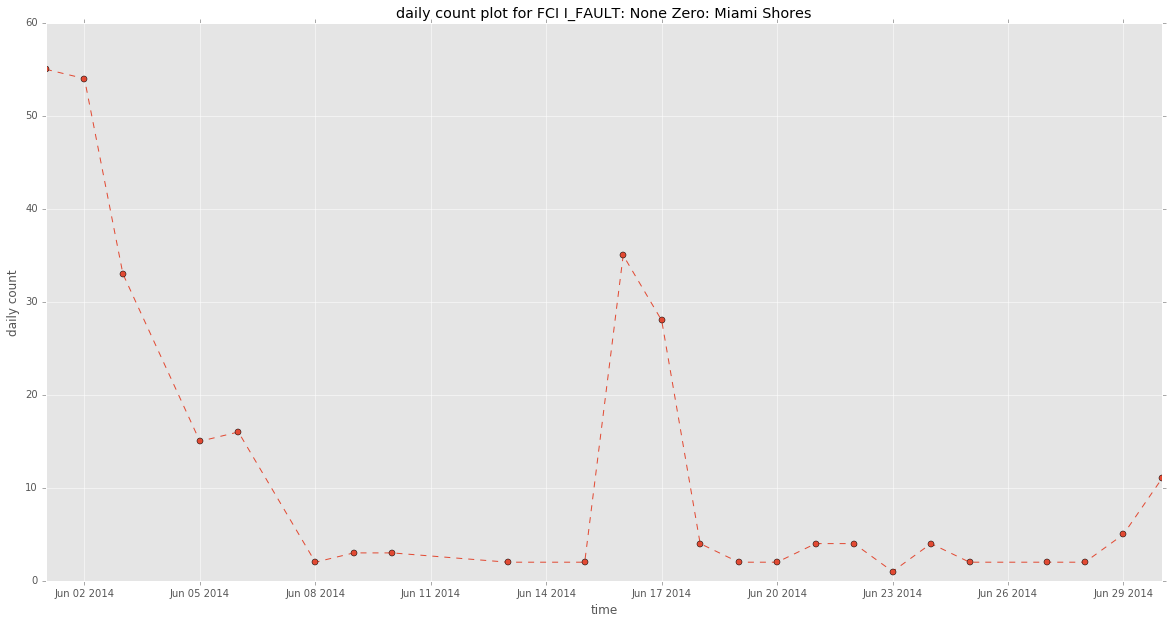

In [23]:
sample_info = 'Miami Shores'

none_zero_fault = s_i_fault_miami_shores.loc[s_i_fault_miami_shores['Value']!=0]
graph_daily_count(
        none_zero_fault, 
        'daily count plot for FCI I_FAULT: None Zero: {}'.format(sample_info)
    )
# looks relatively normal (50+ faults on one day; might be repeating readings)

In [24]:
s_i_fault_miami_shores['Value'].head(10)

0      0
1      0
2    993
3    993
4      0
5      0
6    941
7      0
8      0
9    891
Name: Value, dtype: int64

In [25]:
s_i_fault_miami_shores['ValueString'].head(10)
# ValueString and Value readings look identical (good thing)

0      0
1      0
2    993
3    993
4      0
5      0
6    941
7      0
8      0
9    891
Name: ValueString, dtype: float64

In [26]:
s_i_fault_miami_shores['Status'].value_counts()
# all of them are OK; no unreliable status

OK    646
Name: Status, dtype: int64

## iii. I_FAULT (Seaboard):

In [27]:
s_i_fault_seaboard['Time'].value_counts().head(10)
# some repeated readings

2014-06-18 20:34:00    3
2014-06-06 19:11:00    2
2014-06-24 19:04:00    2
2014-06-17 17:31:00    2
2014-06-18 14:50:00    2
2014-06-17 19:00:00    2
2014-06-25 19:42:00    2
2014-06-16 20:39:00    2
2014-06-06 19:40:00    2
2014-06-17 16:49:00    2
Name: Time, dtype: int64

In [28]:
s_i_fault_seaboard['Value'].value_counts().head(10)
# some repeating readings

0      674
851      7
937      6
911      6
925      6
926      6
875      5
904      5
917      5
922      5
Name: Value, dtype: int64

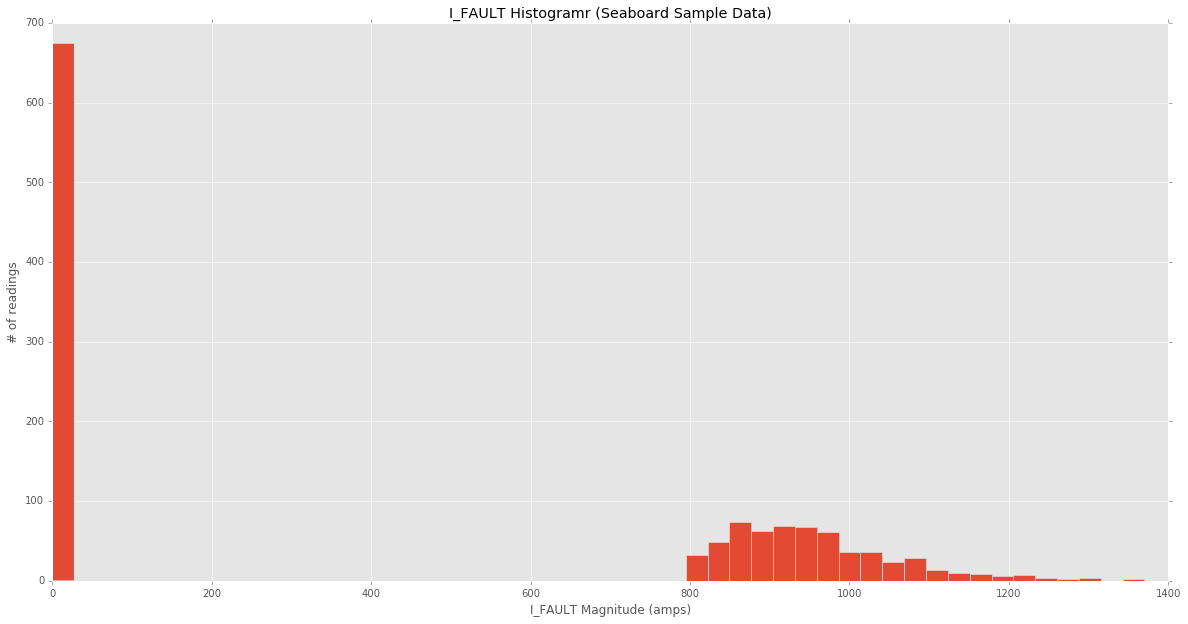

In [29]:
s_i_fault_seaboard['Value'].hist(bins=50, figsize=(20, 10))
plt.ylabel('# of readings')
plt.xlabel('I_FAULT Magnitude (amps)')
plt.title('I_FAULT Histogramr (Seaboard Sample Data)')
plt.show()

/Users/erichsieh/miniconda2/envs/pam_modeling_e/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/erichsieh/miniconda2/envs/pam_modeling_e/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


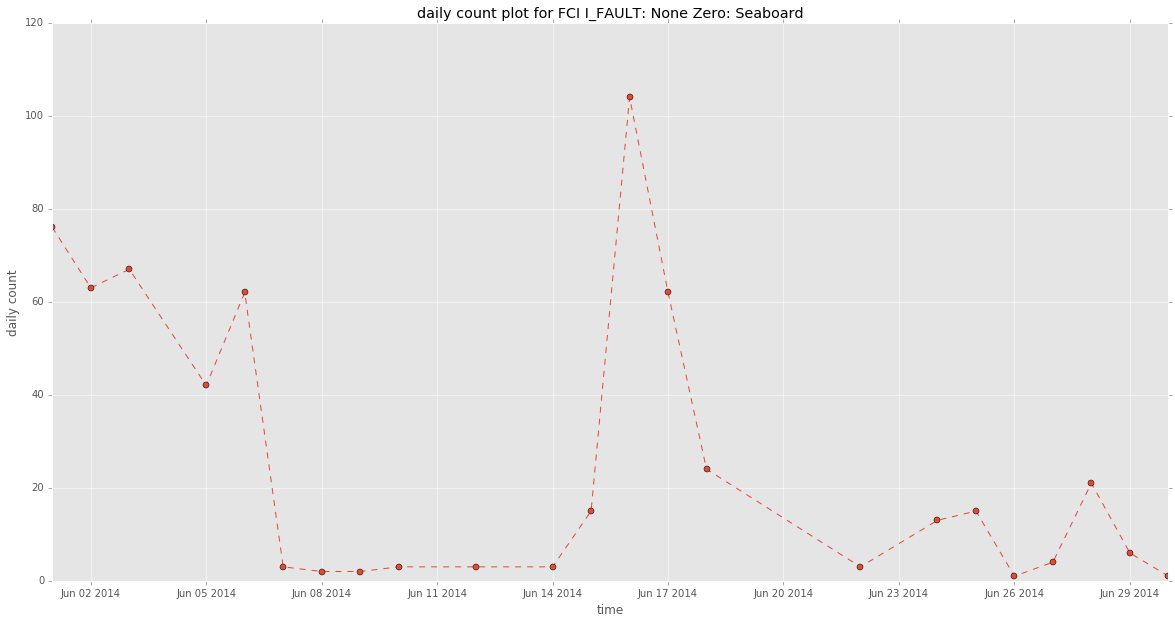

In [30]:
sample_info = 'Seaboard'

none_zero_fault = s_i_fault_seaboard.loc[s_i_fault_seaboard['Value']!=0]
graph_daily_count(
        none_zero_fault, 
        'daily count plot for FCI I_FAULT: None Zero: {}'.format(sample_info)
    )
# looks relatively normal (except for some repeating readings) (100+ faults on one day)

In [31]:
s_i_fault_seaboard['Value'].head(10)

0       0
1       0
2     877
3       0
4       0
5     838
6     838
7       0
8    1034
9       0
Name: Value, dtype: int64

In [32]:
s_i_fault_seaboard['ValueString'].head(10)
# matches value

0       0
1       0
2     877
3       0
4       0
5     838
6     838
7       0
8    1034
9       0
Name: ValueString, dtype: float64

In [33]:
s_i_fault_seaboard['Status'].value_counts()
# all of them are OK; no unreliable status

OK    1269
Name: Status, dtype: int64

## iv. IN_SCAN:

In [34]:
s_in_scan['Time'].value_counts().head(3)
# no repeating readings

2014-12-02 00:53:00    1
2014-12-21 21:50:00    1
2014-12-19 16:25:00    1
Name: Time, dtype: int64

In [35]:
s_in_scan['Value'].value_counts()

1    338
0    317
Name: Value, dtype: int64

In [36]:
s_in_scan['ValueString'].value_counts()
# matches value

NORMAL    338
ALARM     317
Name: ValueString, dtype: int64

In [37]:
s_in_scan['Status'].value_counts().head(3)
# looks normal

OK - SET        338
OK - NOT SET    317
Name: Status, dtype: int64

/Users/erichsieh/miniconda2/envs/pam_modeling_e/lib/python2.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/erichsieh/miniconda2/envs/pam_modeling_e/lib/python2.7/site-packages/ipykernel_launcher.py:14: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


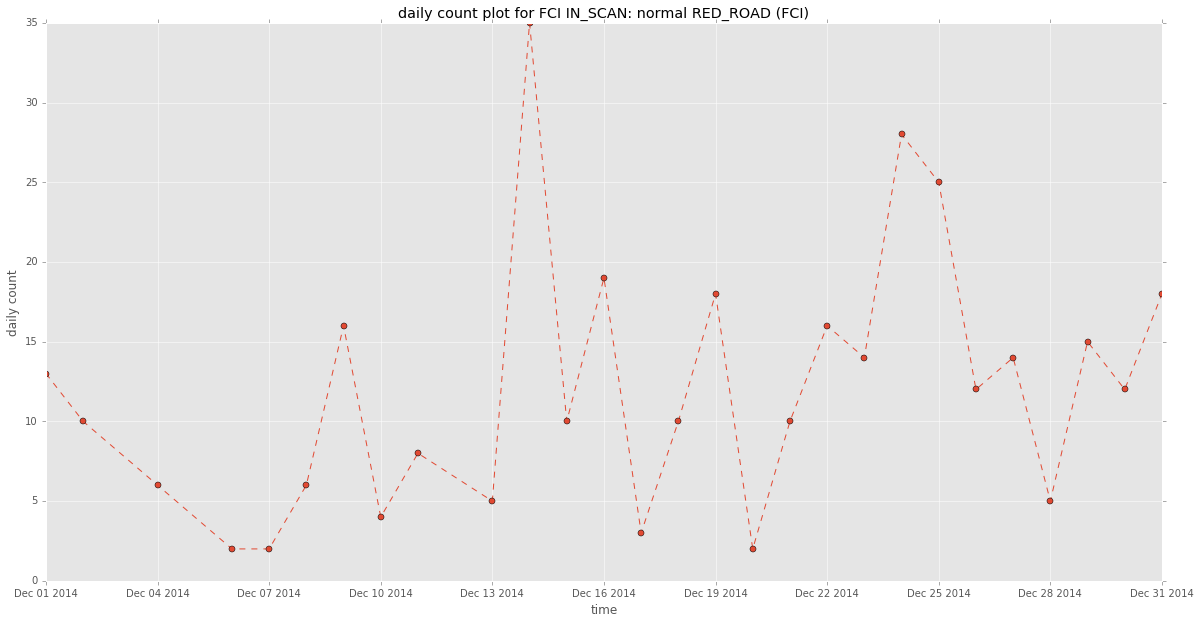

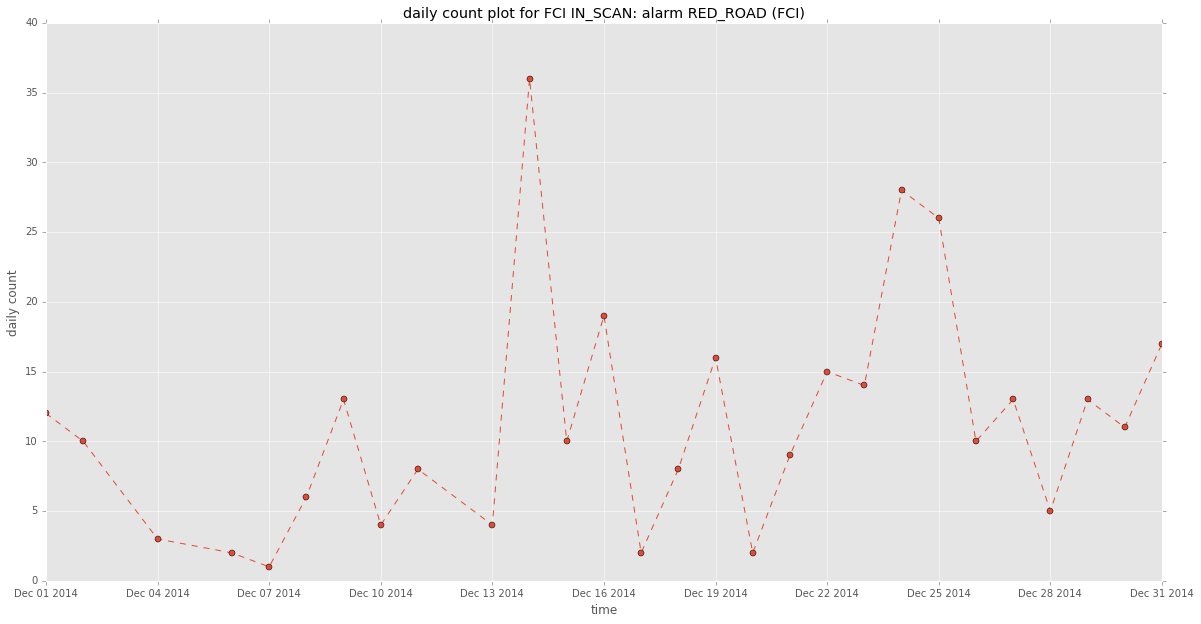

In [38]:
norm_in_scan = s_in_scan.loc[s_in_scan['Value']==1]
alarm_in_scan = s_in_scan.loc[s_in_scan['Value']==0]

sample_info = 'RED_ROAD (FCI)'

graph_daily_count(
        norm_in_scan, 
        'daily count plot for FCI IN_SCAN: normal {}'.format(sample_info)
    )
graph_daily_count(
        alarm_in_scan,
        'daily count plot for FCI IN_SCAN: alarm {}'.format(sample_info)
    )